In [478]:
import os
import numpy as np
import cv2;
# TensorFlow and tf.keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Rescaling

# Set up directories
basalt_dir = "data/Basalt"
marble_dir = "data/marble"
coal_dir = "data/Coal"
granite_dir = "data/Granite/"
limestone_dir = "data/Limestone/"
quartzite_dir = "data/Quartzite/"

# Load images and labels
basalt_images = [os.path.join(basalt_dir, f) for f in os.listdir(basalt_dir)]
marble_images = [os.path.join(marble_dir, f) for f in os.listdir(marble_dir)]
coal_images = [os.path.join(coal_dir, f) for f in os.listdir(coal_dir)]
granite_images = [os.path.join(granite_dir, f) for f in os.listdir(granite_dir)]
limestone_images = [os.path.join(limestone_dir, f) for f in os.listdir(limestone_dir)]
quartzite_images = [os.path.join(quartzite_dir, f) for f in os.listdir(quartzite_dir)]
images = basalt_images + marble_images + coal_images + granite_images + limestone_images + quartzite_images
labels = [0]*len(basalt_images) + [1]*len(marble_images) + [2] * len(coal_images) + [3] * len(granite_images) + [4] * len(limestone_images) + [5] * len(quartzite_images)

# Shuffle and split data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42, stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)

# Load images and convert to numpy array
def load_images(filepaths):
    images = []
    for filepath in filepaths:
        image = cv2.imread(filepath)
        image = cv2.resize(image, (100,100))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        images.append(image)
    return np.array(images)

X_train = load_images(X_train)

X_val = load_images(X_val)
X_test = load_images(X_test)

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


22320000


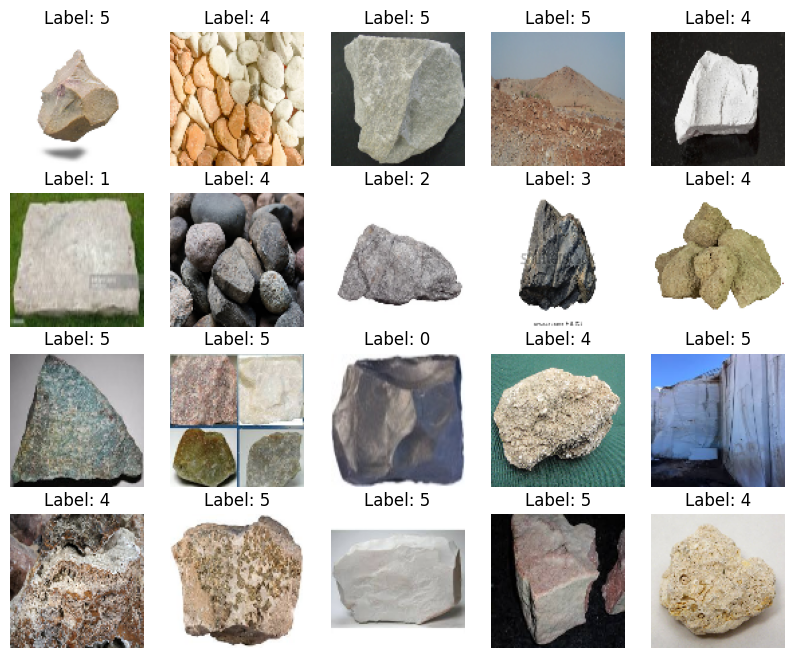

In [479]:
#display all training images using plt
print(X_train.size)
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(10, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i])
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')
plt.show()

In [480]:
# Convert label lists to arrays of one-hot encoded labels
y_train = to_categorical(y_train, num_classes=6)
y_val = to_categorical(y_val, num_classes=6)
y_test = to_categorical(y_test, num_classes=6)

model = tf.keras.Sequential([
    Rescaling(1./255 ,input_shape=(100, 100, 3)),
    Conv2D(32, (3,3), 1, activation='relu'),
    MaxPooling2D(),
    Conv2D(64, (3,3), 1, activation='relu'),
    MaxPooling2D(),
     Conv2D(64, (3,3), 1, activation='relu'),
    MaxPooling2D(),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dense(6, activation='linear')
])
print(X_train.shape, y_train.shape)

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

(744, 100, 100, 3) (744, 6)
Epoch 1/30
24/24 [==============================] - 2s 67ms/step - loss: 1.7429 - accuracy: 0.3683 - val_loss: 1.6123 - val_accuracy: 0.3911
Epoch 2/30
24/24 [==============================] - 2s 64ms/step - loss: 1.4751 - accuracy: 0.4476 - val_loss: 1.4578 - val_accuracy: 0.3992
Epoch 3/30
24/24 [==============================] - 2s 65ms/step - loss: 1.2471 - accuracy: 0.5269 - val_loss: 1.3572 - val_accuracy: 0.3992
Epoch 4/30
24/24 [==============================] - 2s 64ms/step - loss: 1.1835 - accuracy: 0.5470 - val_loss: 1.2551 - val_accuracy: 0.4758
Epoch 5/30
24/24 [==============================] - 2s 63ms/step - loss: 1.0386 - accuracy: 0.5968 - val_loss: 1.2526 - val_accuracy: 0.5444
Epoch 6/30
24/24 [==============================] - 2s 64ms/step - loss: 0.9932 - accuracy: 0.6142 - val_loss: 1.2391 - val_accuracy: 0.5242
Epoch 7/30
24/24 [==============================] - 2s 63ms/step - loss: 0.9524 - accuracy: 0.6371 - val_loss: 1.3560 - val_ac

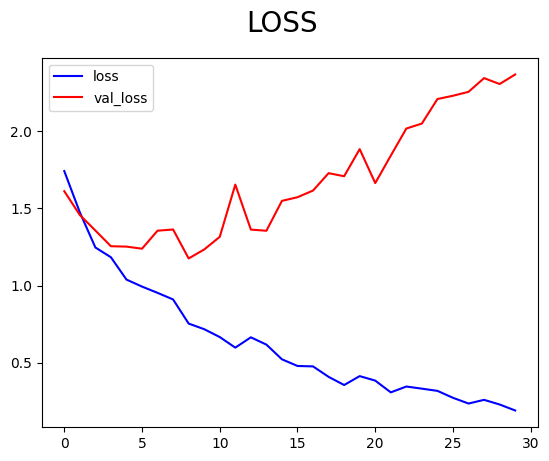

In [481]:
fig = plt.figure()
plt.plot(hist.history['loss'], color="blue", label="loss")
plt.plot(hist.history['val_loss'], color="red", label="val_loss")
fig.suptitle("LOSS", fontsize=20)
plt.legend()
plt.show()


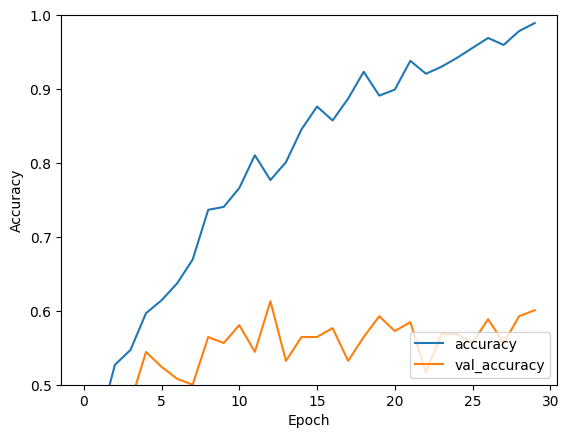

In [482]:
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


8/8 [==============================] - 0s 19ms/step


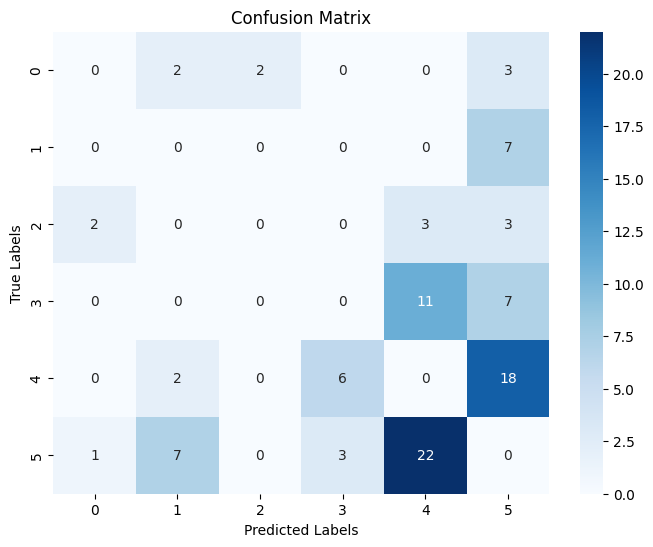

In [483]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get the predicted labels for the validation data
y_pred = model.predict(X_val)
y_pred = np.argmax(y_pred, axis=1)

# Get the true labels for the validation data
y_true = np.argmax(y_val, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)
np.fill_diagonal(cm, 0)

# Create a heatmap from the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', ax=ax)

# Set the axis labels and title
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')

# Display the plot
plt.show()

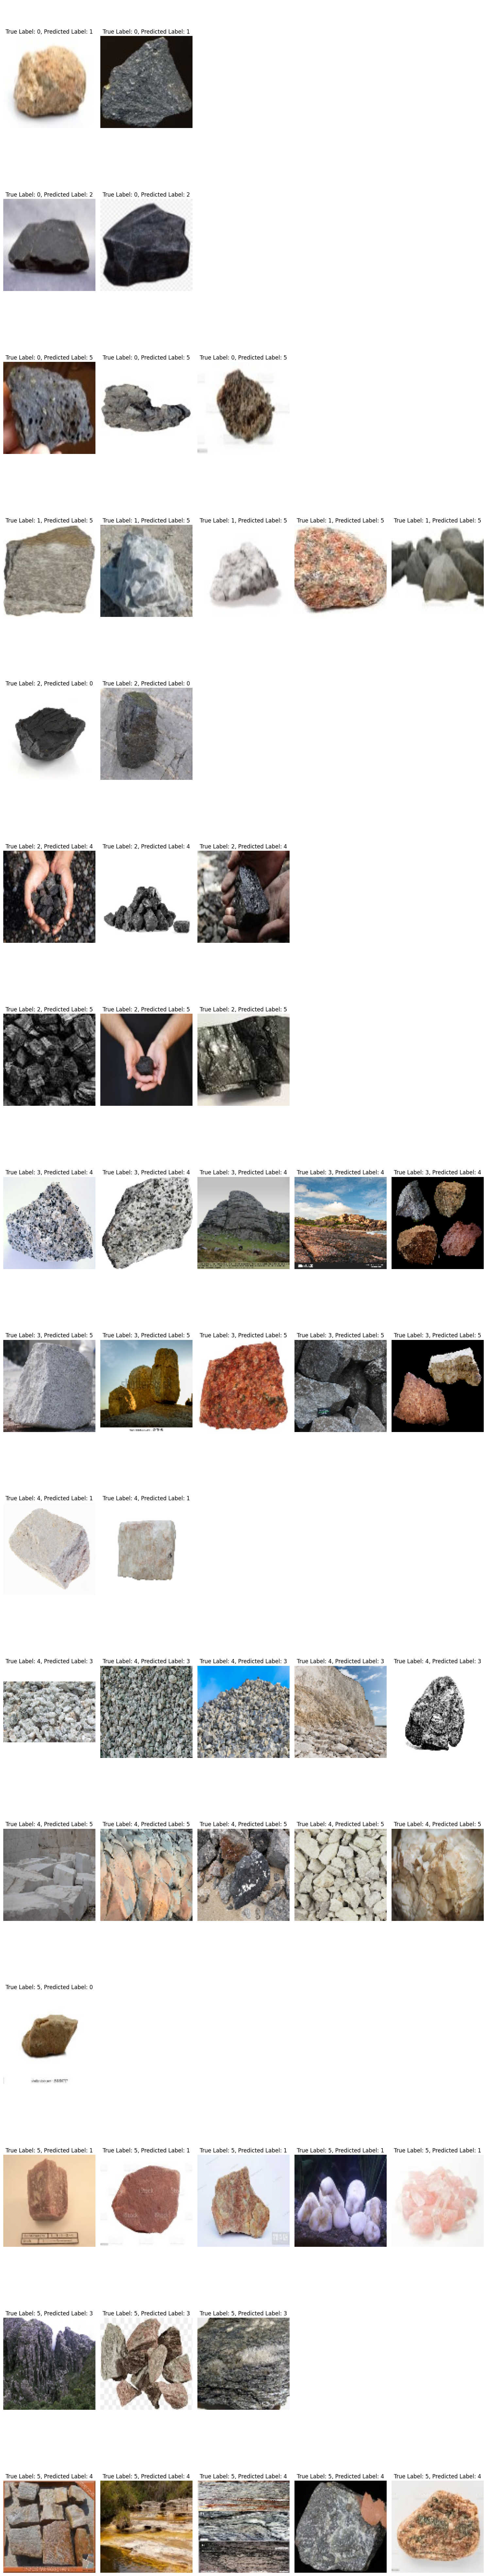

In [484]:

# Get the indices of misclassified images
misclassified = np.where(y_true != y_pred)[0]

# Get the true and predicted labels for the misclassified images
true_labels = y_true[misclassified]
predicted_labels = y_pred[misclassified]

# Get the images corresponding to the misclassified indices
misclassified_images = X_val[misclassified]

# Group the misclassified images by true and predicted labels
misclassified_groups = {}
for true_label in range(6):
    for predicted_label in range(6):
        if true_label != predicted_label:
            indices = np.where((true_labels == true_label) & (predicted_labels == predicted_label))[0]
            if indices.size > 0:
                misclassified_groups[(true_label, predicted_label)] = misclassified_images[indices]

# Display the misclassified images
fig, axs = plt.subplots(len(misclassified_groups), 5, figsize=(15, 5*len(misclassified_groups)))
for i, ((true_label, predicted_label), misclassified_images) in enumerate(misclassified_groups.items()):
    for j in range(5):
        if j < len(misclassified_images): 
            axs[i, j].imshow(misclassified_images[j])
            axs[i, j].set_title(f'True Label: {true_label}, Predicted Label: {predicted_label}')
            axs[i, j].axis('off')
        else:
            axs[i, j].axis('off') 
plt.tight_layout()
plt.show()